In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

- analyze only the users and not the admins
- take into account only logs from the table checker where the status is ready
- you can choose the palette that you enjoy
- the linewidth should be 3
- the background of the graph is gray
- the height should be 10, and the width should 1.5x in relation to the height
- the fontsize of the title should be 30
- the fontsize of the axises labels is 15
- at the end of your Jupyter Notebook create a markdown cell and insert the questions
(answer them looking only at the graphs):

    “Which user was the leader in the number of commits almost all of the time?”
    The answer: user_*.
    “Which user was the leader for only a short period of time?” The answer:
    user_*.

In [4]:
conn = sqlite3.connect('../data/checking-logs.sqlite')

In [5]:
query = '''
SELECT uid, numTrials, timestamp
FROM checker
WHERE uid LIKE 'user_%'
      AND status='ready'
      AND labname='project1'
ORDER BY uid
'''
data = pd.io.sql.read_sql(query, conn, parse_dates=['timestamp'])
data.head()

,uid,numTrials,timestamp
0,user_1,1,2020-05-14 20:56:08.898880
1,user_1,2,2020-05-14 20:58:02.313690
2,user_1,3,2020-05-14 20:58:46.322457
3,user_1,4,2020-05-14 21:08:15.434237
4,user_1,5,2020-05-14 21:10:14.867603


Text(0.5, 0.98, 'Dynamic of commits per user in project1')

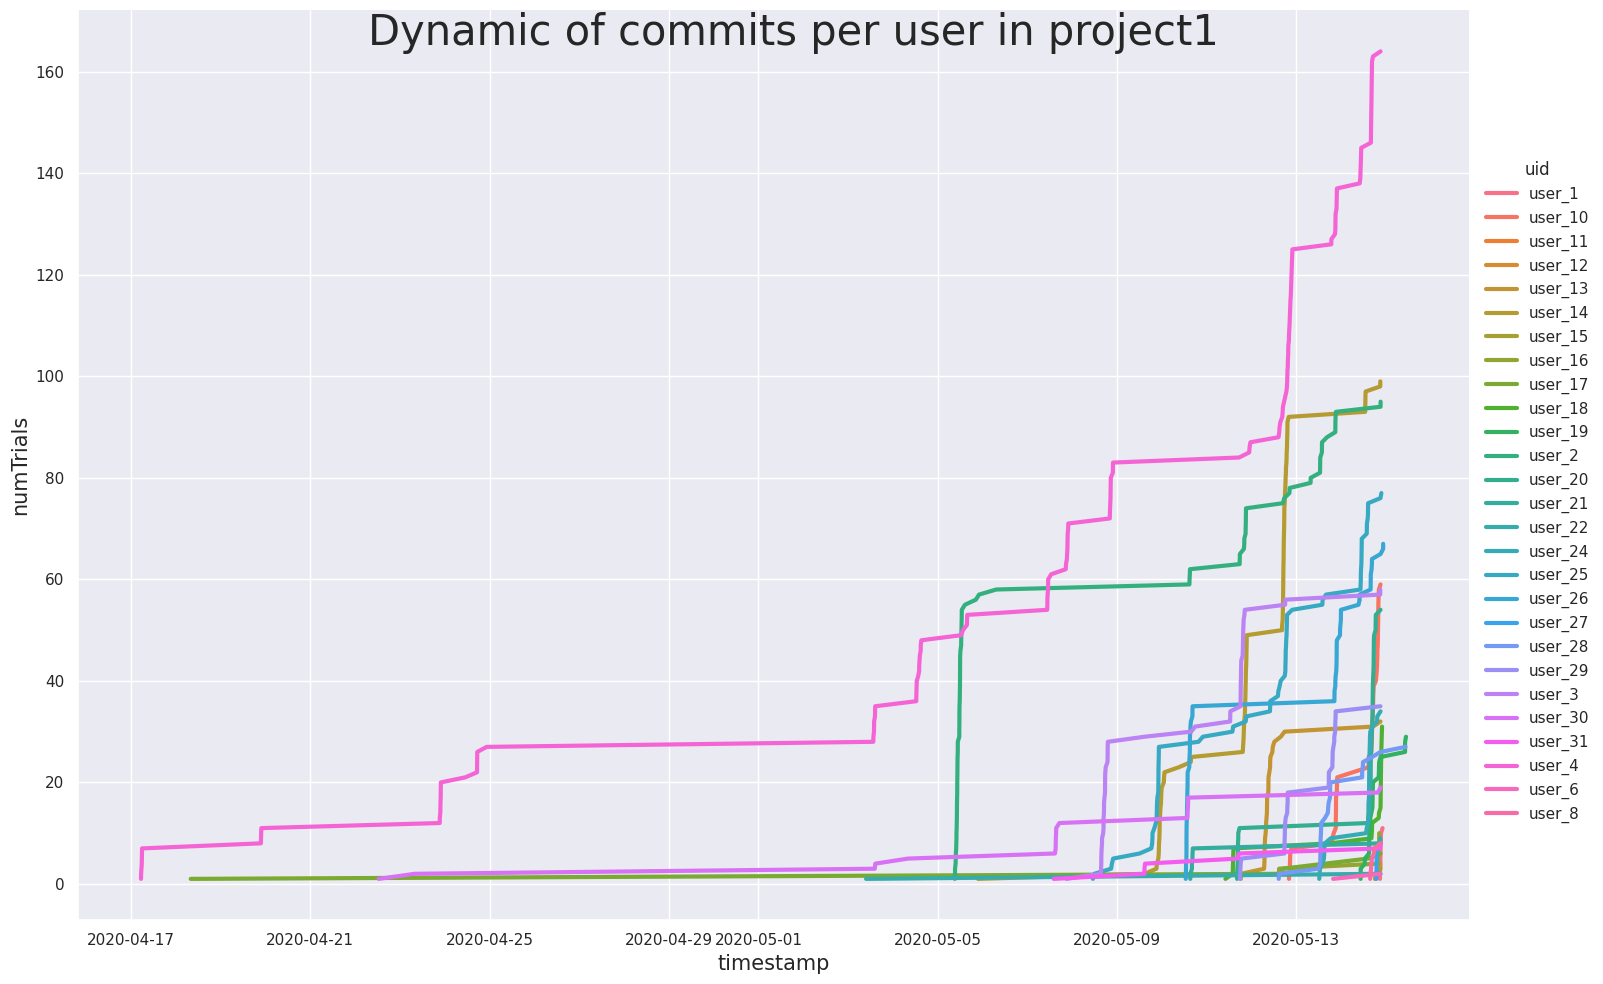

In [14]:
sns.set_theme(palette='dark:#5A9_r',
        rc={'axes.labelsize': 15,
            'lines.linewidth': 3}) 
sns.relplot(data=data,
            x='timestamp',
            y='numTrials',
            legend='full',
            hue='uid',
            kind='line',
            height=10,
            aspect=1.5)
plt.suptitle('Dynamic of commits per user in project1', fontsize=30)

In [15]:
conn.close()

- “Which user was the leader in the number of commits almost all of the time?”
The answer: user_4.
- “Which user was the leader for only a short period of time?” The answer:
user_2.